In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import nltk
import sklearn as sk
import re
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
en_df_raw = pd.read_csv('data/CONcreTEXT_trial_EN.tsv', sep='\t') # load data files
it_df_raw = pd.read_csv('data/CONcreTEXT_trial_IT.tsv', sep='\t')

en_df = pd.DataFrame()
it_df = pd.DataFrame()

en_df_raw.head()

,TARGET,POS,INDEX,TEXT,MEAN
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
1,achievement,N,9,"Please list people you have helped , your pers...",3.03
2,activate,V,1,Add activated carbon straight to your vodka .,3.83
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51
4,adventure,N,9,Look for a partner that shares your level of a...,2.03


## Question 1

In [3]:
en_df_raw['TEXT'][50] # understanding the dataset, so lets print out a sample sentence with at least one apostrophe, comma, and period

'Read the company ’s mission statement , history , and any other information you can find about them . '

In [4]:
# data cleaning
en_df['SENTENCES'] = en_df_raw['TEXT'].apply(lambda sent: sent.strip().lower())
it_df['SENTENCES'] = it_df_raw['TEXT'].apply(lambda sent: sent.strip().lower())

In [5]:
en_df['SENTENCES'][50] # same sample sentence but stripped and lowercase

'read the company ’s mission statement , history , and any other information you can find about them .'

In [6]:
# lets stem words that have an apostrophe followed by s or ll or any other '\w+ pattern

# REGEX (\w+)?['’]\w+
# optional capture group for \w+ to capture any characters before a '
# matches either ' or ’ (because this corpus for some reason uses both :) )
# matches characters after it

# lets get rid of non alphanumeric characters
# lets also tokenize using wordpunct_tokenize

stemmed = en_df['SENTENCES'].apply(lambda sent: re.sub(r"(\w+)?['’]\w+", '', sent)) # getting rid of apostrophe things
only_words = stemmed.apply(lambda sentence: re.sub(r"[^a-zA-Z0-9 ]+", '', sentence)) # getting rid of punctuation, in other words, all non-alphaneumeric characters
en_df['TOKENS'] = only_words.apply(nltk.wordpunct_tokenize) # tokenize :)

In [7]:
en_df['TOKENS'][50] # let's check on our sample sentence

['read',
 'the',
 'company',
 'mission',
 'statement',
 'history',
 'and',
 'any',
 'other',
 'information',
 'you',
 'can',
 'find',
 'about',
 'them']

In [8]:
# make a word2vec!
model = Word2Vec(list(en_df['TOKENS']), window=5, size=500, workers=4, min_count=5)
model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80730>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80760>,
 'your': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b807f0>,
 'life': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80880>,
 'you': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b804c0>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b807c0>,
 'or': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80490>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80310>,
 'when': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80340>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80640>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80550>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b803d0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80160>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80430>,
 'if': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b808e0>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fb4a8b80940>,
 'they': <g

In [9]:
tokens = []
labels = []

for label in model.wv.vocab:
    labels.append(label)
    tokens.append(model.wv[label])

In [10]:
tokens[0][:10] # show some weightings for label 'and', which is label 0

array([ 0.00069411,  0.00040579, -0.00069235, -0.00072604, -0.00081364,
        0.00018211, -0.00031391,  0.00096331, -0.00019748,  0.00066652],
      dtype=float32)

In [11]:
tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=250)

In [12]:
vals = tsne_model.fit_transform(tokens)

In [13]:
x = []
y = []
for v in vals:
    x.append(v[0])
    y.append(v[1])

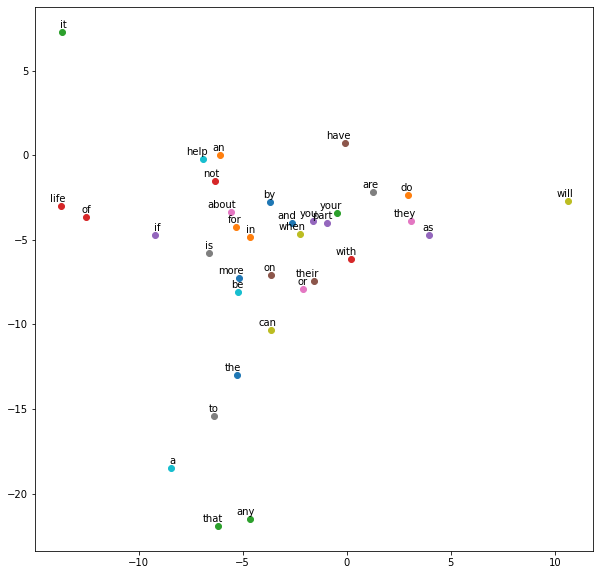

In [14]:
matplot.pyplot.figure(figsize=(10, 10)) 
for i in range(len(x)):
  matplot.pyplot.scatter(x[i],y[i])
  matplot.pyplot.annotate(labels[i],
  xy=(x[i], y[i]),
  xytext=(5, 2),
  textcoords='offset points',
  ha='right',
  va='bottom')

## Question 2
*PROMPT:
Are you satisfied with the quality of the embeddings? Why or why not? 
Give concrete examples of when the model is making correct judgments and when it is failing. Write at least 50 words.*

*You may find the methods such as model.wv.most_similar and self.wv.doesnt_match()
to be useful in determining how the model is behaving. For example, the most similar word to ‘caesar’ in our reference code is ‘brutus’ which may seem correct. You should find similar examples  of words in the English language data you have used to train the model on in Question 1 of this assignment.*


In [18]:
model.wv.most_similar('that')

[('can', 0.07168176770210266),
 ('more', 0.07029658555984497),
 ('on', 0.06906329840421677),
 ('by', 0.06830058991909027),
 ('it', 0.059690751135349274),
 ('if', 0.049779899418354034),
 ('as', 0.04486085847020149),
 ('not', 0.042933836579322815),
 ('an', 0.03949223458766937),
 ('when', 0.025439735502004623)]

In [19]:
model.wv.most_similar('any')

[('not', 0.08582233637571335),
 ('your', 0.061003223061561584),
 ('you', 0.058284662663936615),
 ('be', 0.0581517368555069),
 ('and', 0.057104866951704025),
 ('with', 0.05349364131689072),
 ('do', 0.05342432111501694),
 ('it', 0.048267532140016556),
 ('to', 0.044224128127098083),
 ('if', 0.0402381531894207)]

I am satisfied. You can see how the words "a" and "the" are in the bottom left quadrant. These words have similar functions, so it makes sense that they are closer together. Additionally, observe "that" and "any", around (-5,-23). These words also serve similar functions, i.e. qualifiying *which* subject: "I want *any* pizza" and "I want *that* pizza" are similar sentences and the embdeddings demonstrate that. We can also see that for the most part, the vector tuples for 'that' and 'any' are pretty similar.

Now, of course there's some failures. Consider "it" and "the". They serve the same grammatical function. But 'it' and 'the' are super far apart. I suspect this may be solved by having a larger corpus.

## Question 3 **

*PROMPT:
You have trained your own toy word embedding but there are two important tricks the homework didn't cover, which are Subsampling Frequent Words and Negative Sampling. Explain why we need these two tricks? Write at least 100 words.*

Subsampling Frequent Words addresses the issue where very common words serve a syntactical purpose rather than a semantic purpose. Consider the word "the". It will appear around any noun or adjective. It can just work like that. It's pretty useless for Word2Vec, but not *entirely* useless. Therefore, Subsampling Frequent Words implements an algorithm where there's a chance to remove a word from a window proportional to the words frequency.

Negative Sampling is where the neural network in Word2Vec doesn't update *all* of the weights for each sample when training. Instead, it updates the target word's weight *as well as* a chosen number of negative words to update in the negative direction, i.e. closer to 0. This means we're not updating all weights, but a small percentage of them: the target word weights and N randomly selected negative words that do not appear in the window.